In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
lol = pd.read_csv("./data/high_diamond_ranked_10min.csv")
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# 퍼스트킬과 게임 승패 간의 상관관계
### 가설: 퍼스트킬을 하는 팀이 경기에서 패배하는 경우가 많다.
         (LOL 커뮤니티 상에서 떠도는 속설) 

#### 퍼스트킬을 한 블루팀 추출

In [24]:
lol_mask = lol["blueFirstBlood"] == 1
lol_fk1 = lol[lol_mask]
lol_fk1.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
10,4452162573,0,20,3,1,4,4,6,0,0,...,0,15143,7.2,18196,216,51,-331,1585,21.6,1514.3
11,4453038156,0,33,2,1,11,11,7,1,0,...,0,18200,7.0,19142,188,52,1505,635,18.8,1820.0


#### 퍼스트킬한 블루팀의 이긴 횟수

In [25]:
lol_fk_win = lol_fk1.groupby('blueFirstBlood')[['blueWins']].count()
lol_fk_win

,blueWins
blueFirstBlood,
1,4987


#### 퍼스트킬 못한 블루팀 추출

In [29]:
lol_mask = lol["blueFirstBlood"] == 0
lol_fk0 = lol[lol_mask]
lol_fk0.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1


#### 퍼스트킬 못한 블루팀의 이긴 횟수

In [30]:
lol_fk_lose = lol_fk0.groupby('blueFirstBlood')[['blueWins']].count()
lol_fk_lose

,blueWins
blueFirstBlood,
0,4892


#### 퍼스트킬 유무와 승리 횟수 데이터 병합

In [148]:
lol_concat = pd.concat([lol_fk_win, lol_fk_lose], axis=0)
lol_concat

,blueWins
blueFirstBlood,
1,4987
0,4892


In [49]:
lol_reset = lol_concat.reset_index()
lol_reset

,blueFirstBlood,blueWins
0,1,4987
1,0,4892


#### 퍼스트킬과 블루의 우승횟수 상관관계 : 유의미한 관계 없음. (corr or 히트맵으로 표현하는 게 더 나음)

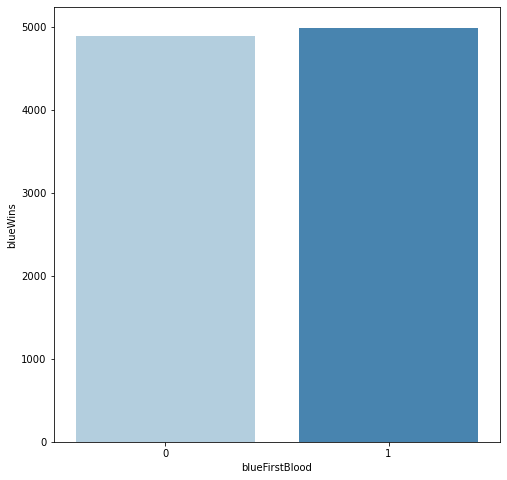

In [58]:
plt.figure(figsize=(8, 8))
sns.barplot(x='blueFirstBlood', y='blueWins', data=lol_reset, palette="Blues")
plt.show()


### 결론: 퍼스트킬과 승패에는 유의미한 상관관계가 없는 것으로 보인다.

# 와드 수와 승패의 상관관계

### 가설: 와드의 개수가 많을수록 승리하는 경우가 많다

#### 와드수에 따라 데이터 오름차순 정렬

In [73]:
lol_sort=lol.sort_values('blueWardsPlaced', ascending = False)
lol_sort

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
8206,4504166210,1,250,4,1,12,10,12,1,0,...,0,16637,6.8,17750,174,56,-3067,-503,17.4,1663.7
3742,4506573625,0,221,1,0,2,14,1,0,0,...,0,19828,7.6,19924,203,55,6707,5252,20.3,1982.8
6116,4468650585,0,209,1,1,5,9,4,1,1,...,0,17381,7.4,19666,202,52,1678,2431,20.2,1738.1
6401,4464495832,1,203,2,1,6,7,12,1,1,...,0,16646,6.8,17774,210,48,-751,-615,21.0,1664.6
6405,4437927077,0,198,1,1,6,9,6,0,0,...,0,17576,7.4,19186,223,40,991,844,22.3,1757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,4526480699,0,8,3,1,6,5,7,1,0,...,0,16032,6.8,17170,198,51,68,-963,19.8,1603.2
8795,4527078331,1,8,1,1,8,4,7,1,1,...,0,15108,6.8,17858,227,61,-3149,-1513,22.7,1510.8
4169,4523728441,1,7,0,1,9,11,10,1,1,...,0,16662,7.0,18461,174,44,-1939,-166,17.4,1666.2
5831,4511949314,1,5,1,0,4,8,5,0,0,...,0,17548,6.8,16966,198,51,2714,427,19.8,1754.8


#### 와드수별 승리횟수의 합

In [149]:
lol_ward_win = lol_sort.groupby('blueWardsPlaced')[['blueWins']].sum()
lol_ward_win


,blueWins
blueWardsPlaced,
5,1
7,1
8,6
9,16
10,42
...,...
198,0
203,1
209,0


#### 와드수별 경기횟수 카운트

In [85]:
lol_ward_cnt = lol_sort.groupby('blueWardsPlaced')[['blueWins']].count()
lol_ward_cnt

,blueWins
blueWardsPlaced,
5,2
7,1
8,16
9,39
10,96
...,...
198,1
203,1
209,1


#### 와드수별 승리횟수의 합 / 와드수별 경기횟수 카운트

In [87]:
lol_win_rate= lol_ward_win / lol_ward_cnt

,blueWins
blueWardsPlaced,
5,0.500000
7,1.000000
8,0.375000
9,0.410256
10,0.437500
...,...
198,0.000000
203,1.000000
209,0.000000


#### 히트맵에 가로로 표현하기 위해 전치행렬 처리 (?)

In [101]:
lol_win_rate.T

blueWardsPlaced,5,7,8,9,10,11,12,13,14,15,...,165,167,176,183,185,198,203,209,221,250
blueWins,0.5,1.0,0.375,0.410256,0.4375,0.443515,0.438479,0.458213,0.464066,0.502876,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


#### 와드수에 따른 승리횟수

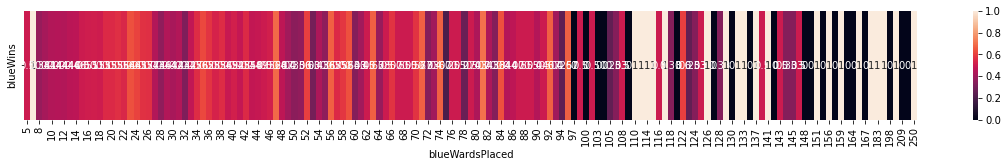

In [145]:
x = lol_win_rate.T
plt.figure(figsize=(20, 2))
sns.heatmap(x, annot=True)
plt.show()


### 결론: 와드의 개수와 경기 승패에는 상관관계가 없는 것으로 보인다.